# Telecom Churn - Case Study by Hari and Krishna

## Problem Statement


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing oneretaining high profitable customers is the number one business goal.

## Outcome of this Case Study

1. Analyse customer-level data of a leading telecom firm
2. Build predictive models to identify customers at high risk of churn
3. Identify the main indicators of churn
4. Predict which customers are at high risk of churn on the 9th Month from the given data.

## Scope of churn for this Case Study

Usage-based churn: 
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

High-value Churn:
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

### Data Understanding 

In [638]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [639]:
#import data into DataFrame

telecom_churn_rawdata_df = pd.read_csv('telecom_churn_data.csv')

In [640]:
telecom_churn_rawdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [641]:
telecom_churn_rawdata_df.shape

(99999, 226)

In [642]:
telecom_churn_rawdata_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Data Preparation

In [643]:
#Remove Null values which are empty by more than 60%
null_values = telecom_churn_rawdata_df.isnull().sum()
listofNull = list(null_values[null_values>(len(telecom_churn_rawdata_df.mobile_number)*60/100)].index)
print(len(listofNull))

40


In [644]:
telecom_churn_reduced_1_df = telecom_churn_rawdata_df.drop(listofNull, axis =1)

In [645]:
telecom_churn_reduced_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 141.9+ MB


In [646]:
pd.set_option('display.max_columns', None)
telecom_churn_reduced_1_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0

### Filtering high value customers

In [647]:
telecom_churn_reduced_1_df.shape

(99999, 186)

In [648]:
# As described in the problem statement, filtering the rows which are high value customers based on their good phase 
telecom_churn_reduced_1_df['good_phase_revenue'] = (telecom_churn_reduced_1_df['total_rech_amt_6'] + telecom_churn_reduced_1_df['total_rech_amt_7'])/2
telecom_churn_reduced_1_df = telecom_churn_reduced_1_df[telecom_churn_reduced_1_df['good_phase_revenue'] > telecom_churn_reduced_1_df['good_phase_revenue'].quantile(0.70)]

In [649]:

telecom_churn_reduced_1_df.shape

(29979, 187)

#### Conclusion:  As expected the number of rows after filtering should be 29,000 rows.

### Tagging Churn customers 

In [650]:
telecom_churn_reduced_1_df['total_usage_col'] = telecom_churn_reduced_1_df['total_og_mou_9'] + telecom_churn_reduced_1_df['total_ic_mou_9'] + telecom_churn_reduced_1_df['vol_2g_mb_9'] + telecom_churn_reduced_1_df['vol_3g_mb_9']

In [651]:
telecom_churn_reduced_1_df['churn'] = telecom_churn_reduced_1_df.total_usage_col.apply(lambda x: 1 if x == 0 else 0)

In [652]:
numberofchurn = telecom_churn_reduced_1_df.churn.sum()

In [653]:
#calculate percentage of churn 

(numberofchurn/len(telecom_churn_reduced_1_df.churn))*100

8.636045231662164

#### Conclusion: there is overall churn possibility of 8.6%

### Dropping columns which are not Insignificant

In [654]:
# Drop list of columns with _9 as we already created the churn data for it

_9_col = [x for x in telecom_churn_reduced_1_df.columns if '_9' in x]
telecom_churn_reduced_2_df = telecom_churn_reduced_1_df.drop(_9_col, axis = 1)

In [655]:
telecom_churn_reduced_2_df.shape

(29979, 145)

In [656]:
#dropping the columns used for filtering and tagging 

Inter_columns = ['good_phase_revenue', 'total_usage_col']
telecom_churn_reduced_2_df = telecom_churn_reduced_2_df.drop(Inter_columns, axis = 1)

In [657]:
telecom_churn_reduced_2_df.shape

(29979, 143)

In [658]:
telecom_churn_reduced_2_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0

In [659]:
# lets remove columns which are not significant 

Insignificant_col = ['mobile_number','circle_id', 'last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8' ]
telecom_churn_reduced_2_df = telecom_churn_reduced_2_df.drop(Insignificant_col, axis = 1)
telecom_churn_reduced_2_df.shape

(29979, 138)

### Treating missing values

In [660]:
#Analyse columns with Null values
null_values = telecom_churn_reduced_2_df.isnull().sum()
listofNull = list(null_values[null_values>0].index)
print(len(listofNull))

93


In [661]:
#lets see how many values are missing, based on that lets take a call on whether to impute or to delete it 
before_droppingrows = telecom_churn_reduced_2_df.shape[0]
telecom_churn_reduced_3_df = telecom_churn_reduced_2_df.dropna(axis = 0)
after_droppingrows = telecom_churn_reduced_3_df.shape[0]

In [662]:
# % of rows removed 
print(((before_droppingrows - after_droppingrows)/before_droppingrows)*100)

5.083558490943661


In [663]:
#lets see if any more columns with Null values are present 
null_values = telecom_churn_reduced_3_df.isnull().sum()
listofNull = list(null_values[null_values>0].index)
print(len(listofNull))

0


#### Conclusion : Only 5% of the overall data is removed. so its ok to remove the rows with empty values as they dont add much value

### Find list of columns which has only one unique value. which can hence be removed.

In [664]:
Listofcolumns  = list(telecom_churn_reduced_3_df.columns)
Columnstoberemoved_L = []
for each in Listofcolumns:
    if len(telecom_churn_reduced_3_df.loc[:, each].unique()) == 1:
            Columnstoberemoved_L.append(each)
        
telecom_churn_reduced_4_df = telecom_churn_reduced_3_df.drop(Columnstoberemoved_L, axis =1)
telecom_churn_reduced_4_df.shape

(28455, 129)

In [665]:
telecom_churn_reduced_4_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,6/20/2014,7/22/2014,8/30/2014,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83

### Creating Derived Metrics 

In [666]:
telecom_churn_reduced_5_df = telecom_churn_reduced_4_df

In [667]:
#Calculate Date from last day of the month for recharge 
telecom_churn_reduced_5_df['Recharge_on_days_before_EOM_6'] = telecom_churn_reduced_5_df.date_of_last_rech_6.apply(lambda x: (30 - int(x.split('/')[1])))
telecom_churn_reduced_5_df['Recharge_on_days_before_EOM_7'] = telecom_churn_reduced_5_df.date_of_last_rech_7.apply(lambda x: (31 - int(x.split('/')[1])))
telecom_churn_reduced_5_df['Recharge_on_days_before_EOM_8'] = telecom_churn_reduced_5_df.date_of_last_rech_8.apply(lambda x: (31 - int(x.split('/')[1])))

In [668]:
# Remove date time columns as its not needed

telecom_churn_reduced_5_df = telecom_churn_reduced_5_df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis = 1)

In [669]:
telecom_churn_reduced_5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28455 entries, 7 to 99997
Columns: 129 entries, arpu_6 to Recharge_on_days_before_EOM_8
dtypes: float64(100), int64(29)
memory usage: 28.2 MB


#### Conclusion: Now we have all numerical columns

In [670]:
telecom_churn_reduced_5_df.shape

(28455, 129)

#### Combining 6,7 columns as forming them as a good phase

In [671]:
telecom_churn_reduced_5_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Recharge_on_days_before_EOM_6,Recharge_on_days_before_EOM_7,Recharge_on_days_before_EOM_8
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,3,6,5
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,5,0,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0,10,9,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,2

In [672]:
def average_func(x):
    telecom_churn_reduced_5_df[x+'_good'] = (telecom_churn_reduced_5_df[x+'_6'] + telecom_churn_reduced_5_df[x+'_7'])/2
    

In [673]:
average_func('arpu')
average_func('onnet_mou')
average_func('offnet_mou')
average_func('roam_ic_mou')
average_func('roam_og_mou')
average_func('loc_og_t2t_mou')
average_func('loc_og_t2m_mou')
average_func('loc_og_t2f_mou')
average_func('loc_og_t2c_mou')
average_func('loc_og_mou')
average_func('std_og_t2t_mou')
average_func('std_og_t2m_mou')
average_func('std_og_t2f_mou')
average_func('std_og_mou')
average_func('isd_og_mou')
average_func('spl_og_mou')
average_func('og_others')
average_func('total_og_mou')
average_func('loc_ic_t2t_mou')
average_func('loc_ic_t2m_mou')
average_func('loc_ic_t2f_mou')
average_func('loc_ic_mou')
average_func('std_ic_t2t_mou')
average_func('std_ic_t2m_mou')
average_func('std_ic_t2f_mou')
average_func('std_ic_mou')
average_func('total_ic_mou')
average_func('spl_ic_mou')
average_func('isd_ic_mou')
average_func('ic_others')
average_func('total_rech_num')
average_func('total_rech_amt')
average_func('max_rech_amt')
average_func('last_day_rch_amt')
average_func('vol_2g_mb')
average_func('vol_3g_mb')
average_func('monthly_2g')
average_func('sachet_2g')
average_func('monthly_3g')
average_func('sachet_3g')
average_func('Recharge_on_days_before_EOM')


In [674]:
telecom_churn_reduced_5_df.shape

(28455, 170)

In [675]:
#drop columns with _6 and _7

_6_7_col = [x for x in telecom_churn_reduced_5_df.columns if '_6' in x]
telecom_churn_reduced_6_df = telecom_churn_reduced_5_df.drop(_6_7_col, axis = 1)

_6_7_col = [x for x in telecom_churn_reduced_5_df.columns if '_7' in x]
telecom_churn_reduced_6_df = telecom_churn_reduced_6_df.drop(_6_7_col, axis = 1)

In [676]:
telecom_churn_reduced_6_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Recharge_on_days_before_EOM_8,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,Recharge_on_days_before_EOM_good
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1,5,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,4.5
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,315,21.03,910.65,122.16,0.0,0,1,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.00,0.00,0.000,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.0,375.475,0.5,0.5,0.0,0.0,2.5
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.00,0,3,0,0,2607,0.00,0.00,0.00,0.0,0,1,349.2585,305.075,266.295,83.885,21.620,27.910,99.205,2.270,0.0,129.395,266.195,154.150,0.00,420.355,0.00,0.00,0.000,549.750,37.730,80.705,2.405,120.845,76.985,168.960,0.000,245.950,570.595,0.225,153.695,49.860,5.0,380.0,110.0,80.0,0.0,0.000,0.0,0.0,0.0,0.0,9.5
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.00,0,0,0,0,511,0.00,2.45,21.89,0.0,0,17,365.4220,62.260,263.015,1.415,8.870,53.885,209.640,2.240,0.0,265.775,5.235,43.750,0.00,48.990,0.00,1.63,0.000,316.410,56.385,188.250,8.695,253.345,73.715,45.880,0.255,119.860,373.210,0.000,0.000,0.000,8.0,459.0,110.0,100.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.00,0,0,0,0,667,0.00,0.00,0.00,0.0,0,6,354.4940,597.595,30.820,2.380,4.230,19.495,29.270,0.000,0.0,48.770,573.860,0.775,0.00,574.635,0.00,1.29,0.465,625.170,17.270,24.860,0.000,42.135,4.315,0.640,0.000,4.955,47.095,0.000,0.000,0.000,10.5,408.0,55.0,15.0,0.0,0.000,0.0,0.0,0.0,0.0,0.5


In [677]:
#vbc_3g column doesnt maintain the proper naming convention so lets change that
telecom_churn_reduced_6_df['vbc_3g_good'] = (telecom_churn_reduced_6_df['jun_vbc_3g'] + telecom_churn_reduced_5_df['jul_vbc_3g'])/2
telecom_churn_reduced_6_df['vbc_3g_8'] = telecom_churn_reduced_6_df['aug_vbc_3g']

In [678]:
#drop columns corresponding to vbc

telecom_churn_reduced_7_df = telecom_churn_reduced_6_df.drop(['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g'], axis=1)

In [679]:
telecom_churn_reduced_7_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,Recharge_on_days_before_EOM_8,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,Recharge_on_days_before_EOM_good,vbc_3g_good,vbc_3g_8
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,802,1,5,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,4.5,19.060,57.74
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,315,0,1,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.00,0.00,0.000,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.0,375.475,0.5,0.5,0.0,0.0,2.5,516.405,21.03
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.00,0,3,0,0,2607,0,1,349.2585,305.075,266.295,83.885,21.620,27.910,99.205,2.270,0.0,129.395,266.195,154.150,0.00,420.355,0.00,0.00,0.000,549.750,37.730,80.705,2.405,120.845,76.985,168.960,0.000,245.950,570.595,0.225,153.695,49.860,5.0,380.0,110.0,80.0,0.0,0.000,0.0,0.0,0.0,0.0,9.5,0.000,0.00
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.00,0,0,0,0,511,0,17,365.4220,62.260,263.015,1.415,8.870,53.885,209.640,2.240,0.0,265.775,5.235,43.750,0.00,48.990,0.00,1.63,0.000,316.410,56.385,188.250,8.695,253.345,73.715,45.880,0.255,119.860,373.210,0.000,0.000,0.000,8.0,459.0,110.0,100.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,12.170,0.00
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.00,0,0,0,0,667,0,6,354.4940,597.595,30.820,2.380,4.230,19.495,29.270,0.000,0.0,48.770,573.860,0.775,0.00,574.635,0.00,1.29,0.465,625.170,17.270,24.860,0.000,42.135,4.315,0.640,0.000,4.955,47.095,0.000,0.000,0.000,10.5,408.0,55.0,15.0,0.0,0.000,0.0,0.0,0.0,0.0,0.5,0.000,0.00


In [680]:
telecom_churn_reduced_7_df.shape

(28455, 86)

In [681]:
# Calculate % difference in behaviour between good and action(8) phase

In [682]:
def Percent_diff_func(x):
    telecom_churn_reduced_7_df[x+'_action_good_perct_diff'] = round((((telecom_churn_reduced_7_df[x+'_8'] - telecom_churn_reduced_7_df[x+'_good'])/telecom_churn_reduced_7_df[x+'_good'])*100),2)
        

In [683]:
Percent_diff_func('arpu')
Percent_diff_func('onnet_mou')
Percent_diff_func('offnet_mou')
Percent_diff_func('roam_ic_mou')
Percent_diff_func('roam_og_mou')
Percent_diff_func('loc_og_t2t_mou')
Percent_diff_func('loc_og_t2m_mou')
Percent_diff_func('loc_og_t2f_mou')
Percent_diff_func('loc_og_t2c_mou')
Percent_diff_func('loc_og_mou')
Percent_diff_func('std_og_t2t_mou')
Percent_diff_func('std_og_t2m_mou')
Percent_diff_func('std_og_t2f_mou')
Percent_diff_func('std_og_mou')
Percent_diff_func('isd_og_mou')
Percent_diff_func('spl_og_mou')
Percent_diff_func('og_others')
Percent_diff_func('total_og_mou')
Percent_diff_func('loc_ic_t2t_mou')
Percent_diff_func('loc_ic_t2m_mou')
Percent_diff_func('loc_ic_t2f_mou')
Percent_diff_func('loc_ic_mou')
Percent_diff_func('std_ic_t2t_mou')
Percent_diff_func('std_ic_t2m_mou')
Percent_diff_func('std_ic_t2f_mou')
Percent_diff_func('std_ic_mou')
Percent_diff_func('total_ic_mou')
Percent_diff_func('spl_ic_mou')
Percent_diff_func('isd_ic_mou')
Percent_diff_func('ic_others')
Percent_diff_func('total_rech_num')
Percent_diff_func('total_rech_amt')
Percent_diff_func('max_rech_amt')
Percent_diff_func('last_day_rch_amt')
Percent_diff_func('vol_2g_mb')
Percent_diff_func('vol_3g_mb')
Percent_diff_func('monthly_2g')
Percent_diff_func('sachet_2g')
Percent_diff_func('monthly_3g')
Percent_diff_func('sachet_3g')
Percent_diff_func('Recharge_on_days_before_EOM')
Percent_diff_func('vbc_3g')

In [684]:
telecom_churn_reduced_8_df = telecom_churn_reduced_7_df

In [685]:
telecom_churn_reduced_8_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,Recharge_on_days_before_EOM_8,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,Recharge_on_days_before_EOM_good,vbc_3g_good,vbc_3g_8,arpu_action_good_perct_diff,onnet_mou_action_good_perct_diff,offnet_mou_action_good_perct_diff,roam_ic_mou_action_good_perct_diff,roam_og_mou_action_good_perct_diff,loc_og_t2t_mou_action_good_perct_diff,loc_og_t2m_mou_action_good_perct_diff,loc_og_t2f_mou_action_good_perct_diff,loc_og_t2c_mou_action_good_perct_diff,loc_og_mou_action_good_perct_diff,std_og_t2t_mou_action_good_perct_diff,std_og_t2m_mou_action_good_perct_diff,std_og_t2f_mou_action_good_perct_diff,std_og_mou_action_good_perct_diff,isd_og_mou_action_good_perct_diff,spl_og_mou_action_good_perct_diff,og_others_action_good_perct_diff,total_og_mou_action_good_perct_diff,loc_ic_t2t_mou_action_good_perct_diff,loc_ic_t2m_mou_action_good_perct_diff,loc_ic_t2f_mou_action_good_perct_diff,loc_ic_mou_action_good_perct_diff,std_ic_t2t_mou_action_good_perct_diff,std_ic_t2m_mou_action_good_perct_diff,std_ic_t2f_mou_action_good_perct_diff,std_ic_mou_action_good_perct_diff,total_ic_mou_action_good_perct_diff,spl_ic_mou_action_good_perct_diff,isd_ic_mou_action_good_perct_diff,ic_others_action_good_perct_diff,total_rech_num_action_good_perct_diff,total_rech_amt_action_good_perct_diff,max_rech_amt_action_good_perct_diff,last_day_rch_amt_action_good_perct_diff,vol_2g_mb_action_good_perct_diff,vol_3g_mb_action_good_perct_diff,monthly_2g_action_good_perct_diff,sachet_2g_action_good_perct_diff,monthly_3g_action_good_perct_diff,sachet_3g_action_good_perct_diff,Recharge_on_days_before_EOM_action_good_perct_diff,vbc_3g_action_good_perct_diff
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,802,1,5,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,4.5,19.060,57.74,162.21,-7.06,-36.13,27.27,109.52,-2.67,-57.07,-9.22,NaN,-46.49,-12.94,20.37,24.76,14.47,11022.22,188.89,NaN,-36.15,-39.58,-44.79,-68.83,-51.98,24.75,29.41,-48.61,9.69,-27.61,-100.0,280.83,-2.1,40.0,207.00,33.33,inf,NaN,NaN,NaN,NaN,NaN,NaN,11.11,202.94
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,315,0,1,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.00,0.00,0.000,470.010,16.840,35.780,0.000,52.630,0.290,

In [686]:
telecom_churn_reduced_8_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28455 entries, 7 to 99997
Columns: 128 entries, arpu_8 to vbc_3g_action_good_perct_diff
dtypes: float64(117), int64(11)
memory usage: 28.0 MB


### Data Analysis

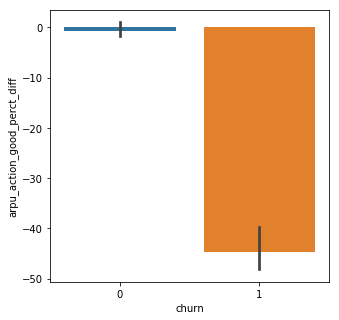

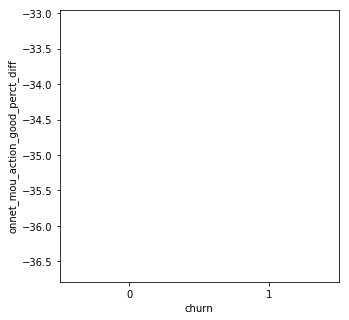

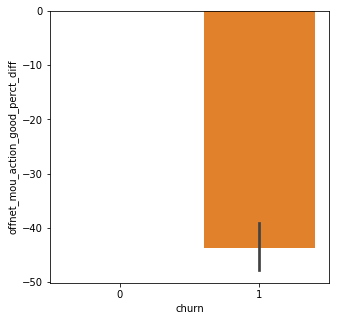

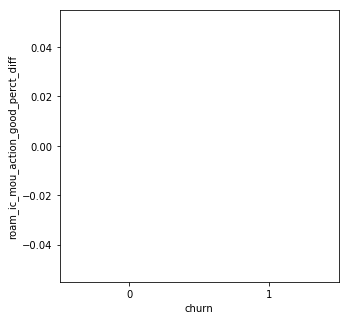

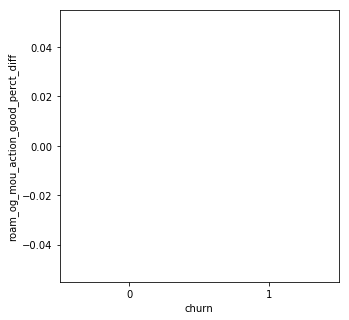

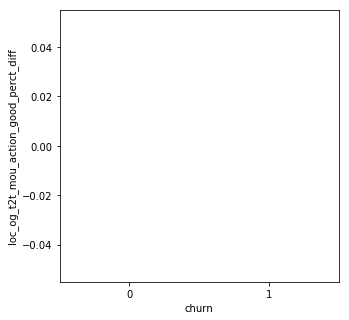

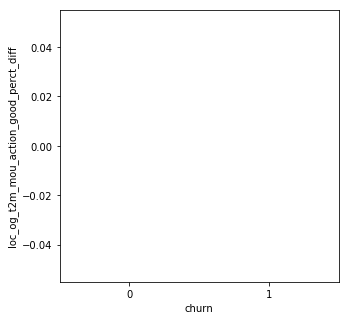

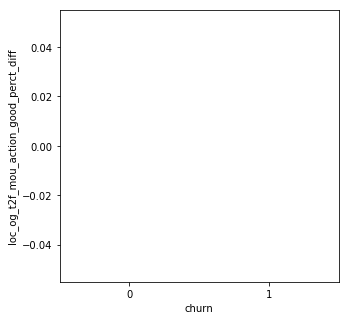

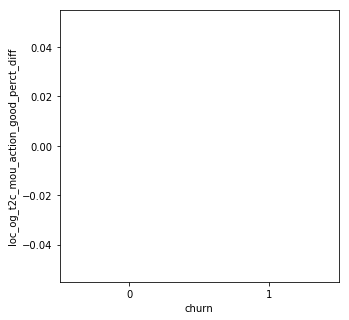

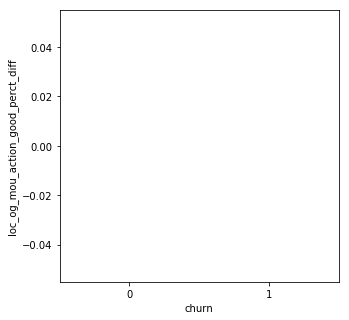

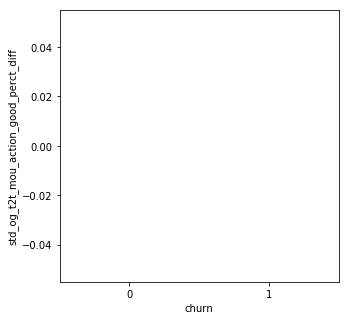

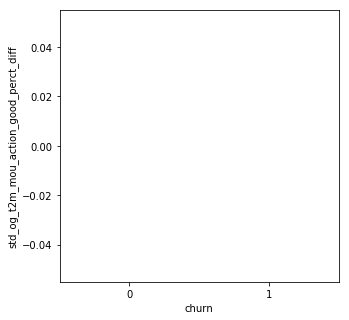

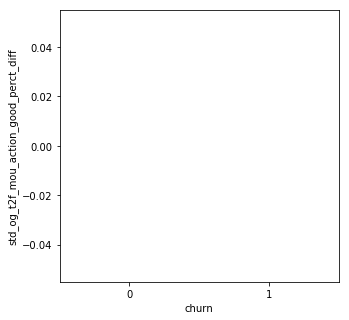

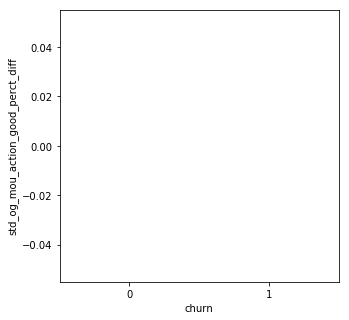

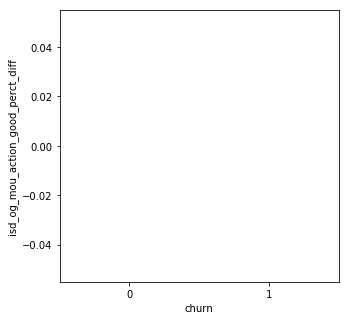

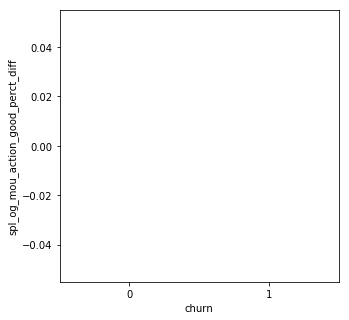

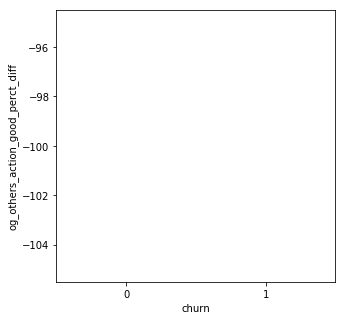

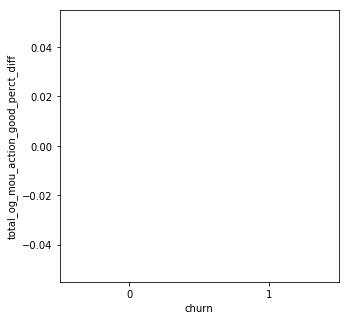

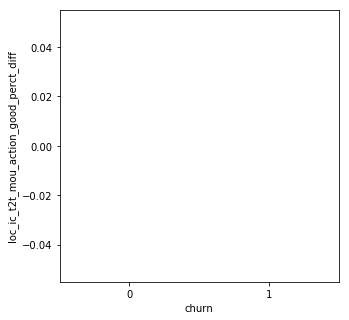

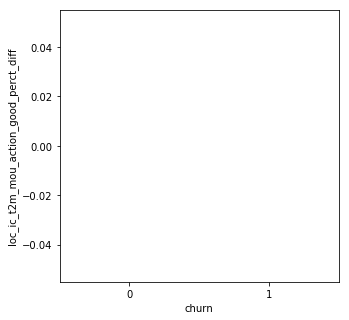

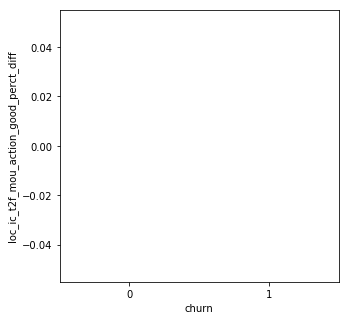

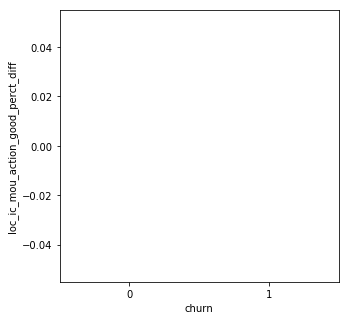

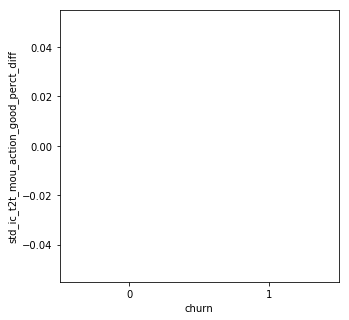

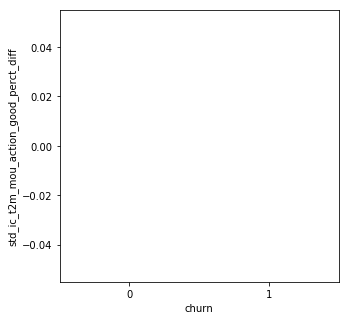

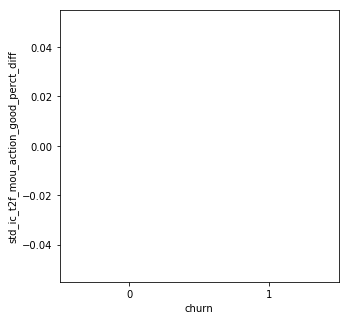

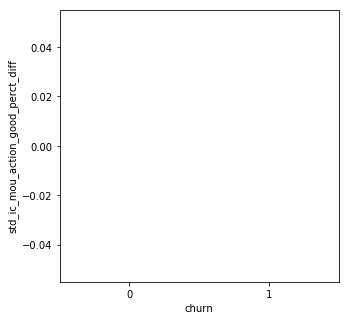

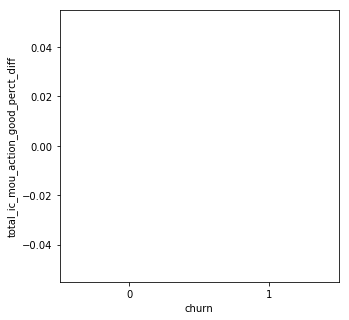

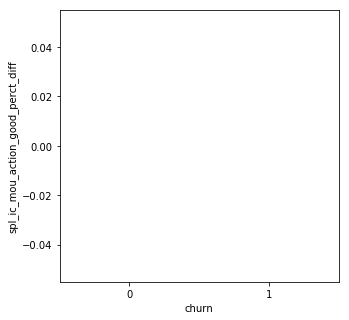

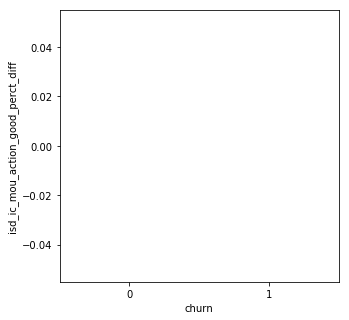

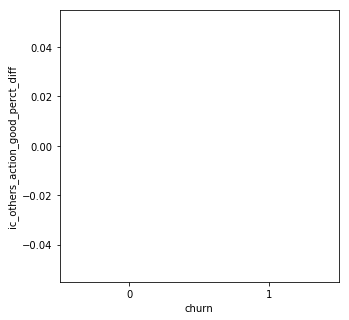

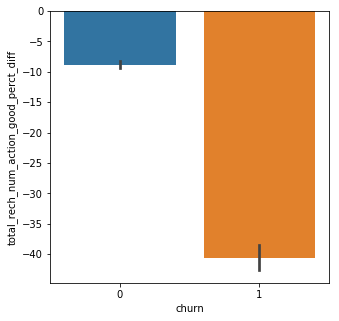

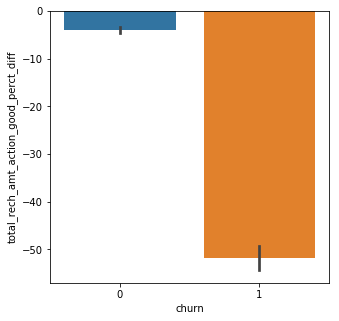

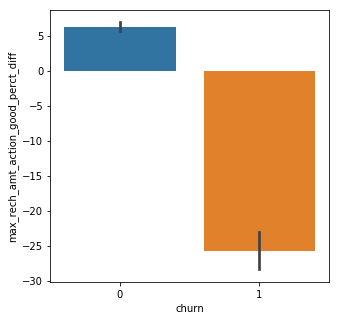

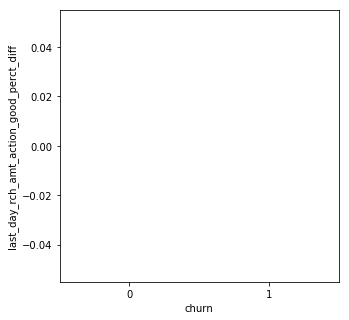

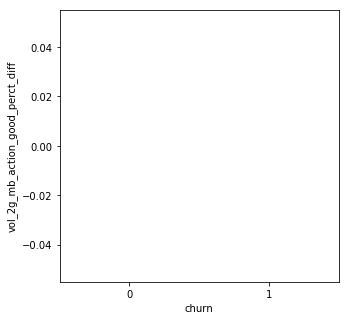

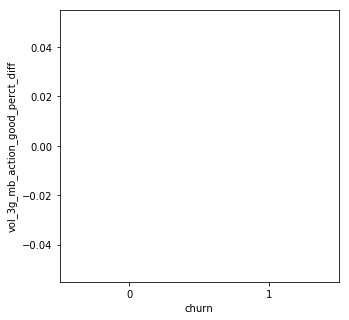

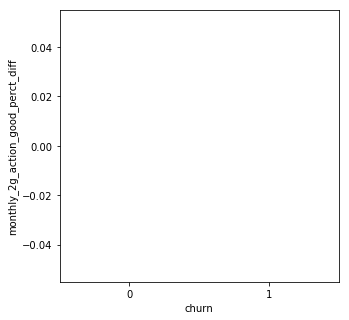

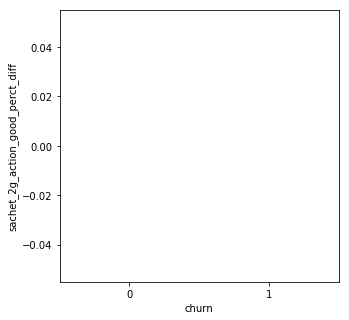

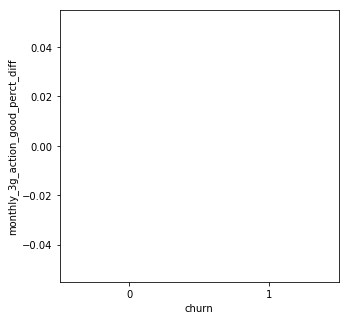

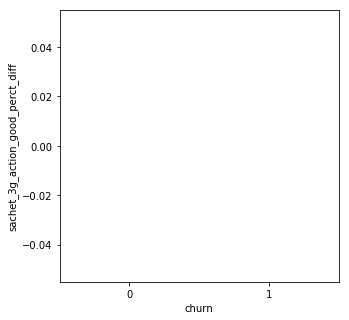

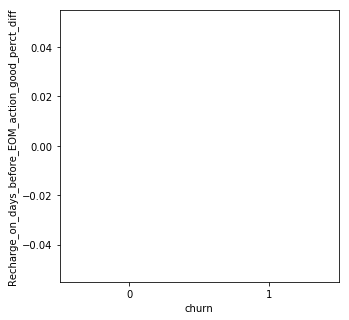

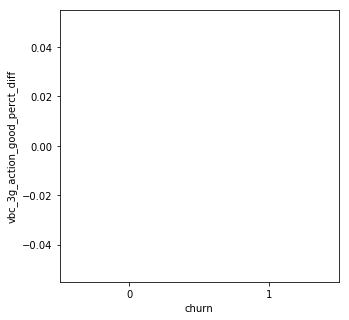

In [687]:
#sns.barplot(x='churn', y='arpu_action_good_perct_diff', data=telecom_churn_reduced_8_df)

col_diffin_phase = [x for x in telecom_churn_reduced_8_df.columns if '_action_good_perct_diff' in x]

for col in col_diffin_phase:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=telecom_churn_reduced_8_df)
    plt.show()

#### Conclusion: based on above plots we can observe that arpu, offnet, Total_rech_num, total_recharge_amt, max_rechargeamt significantly drops when transitioning from good to action phase and further contribute to churn 

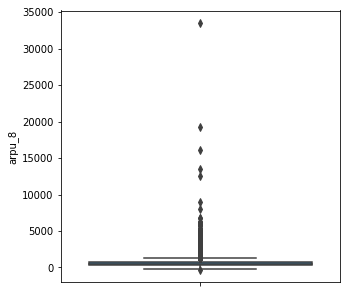

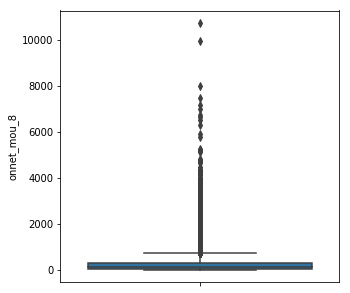

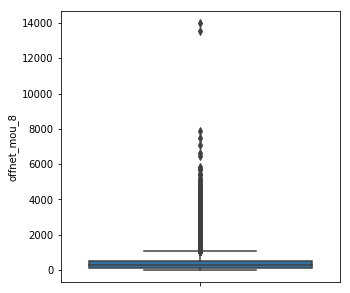

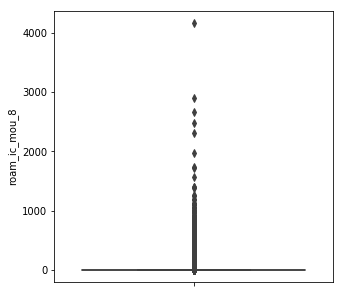

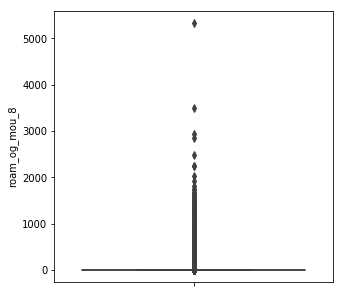

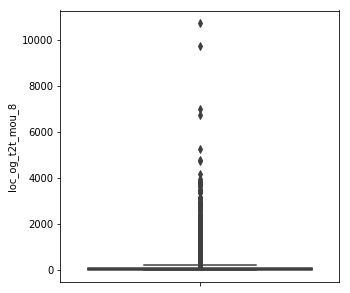

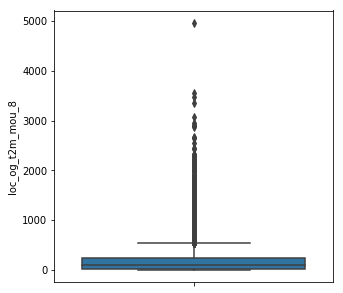

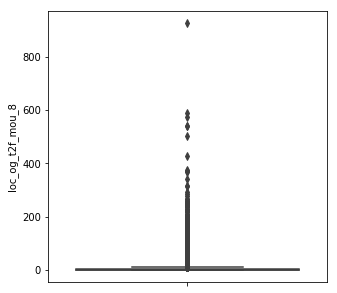

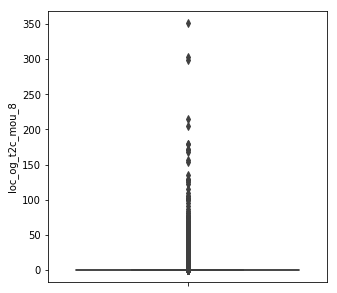

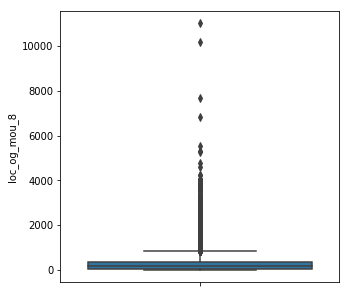

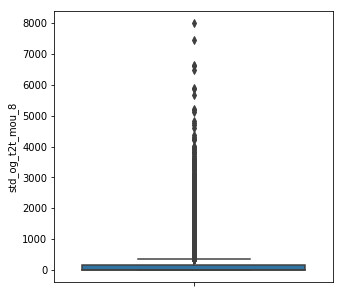

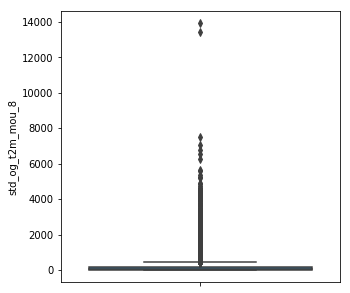

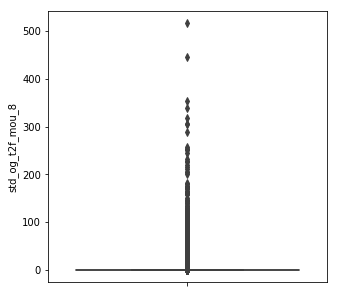

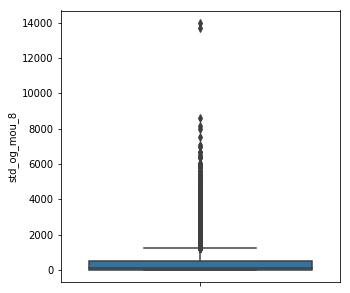

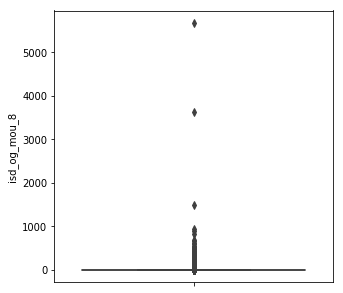

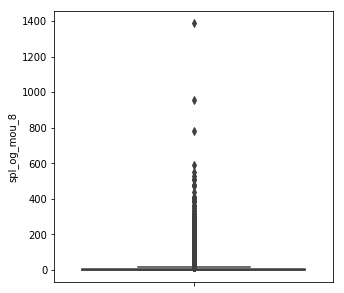

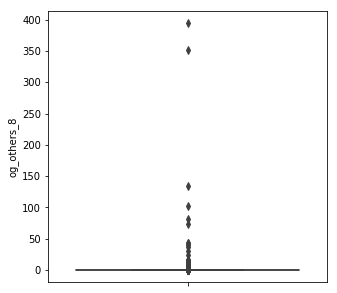

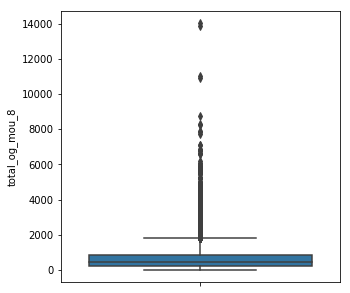

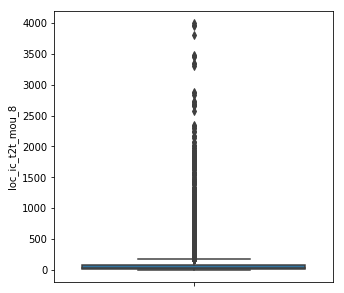

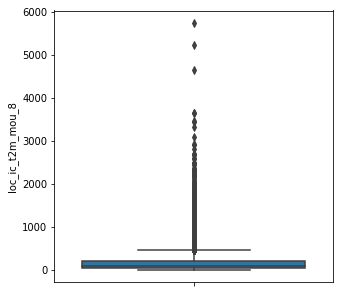

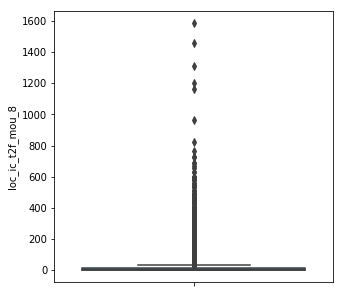

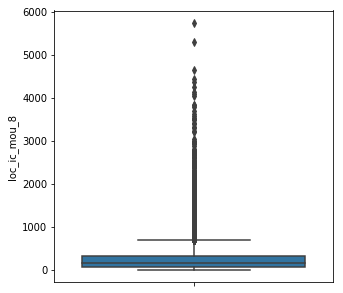

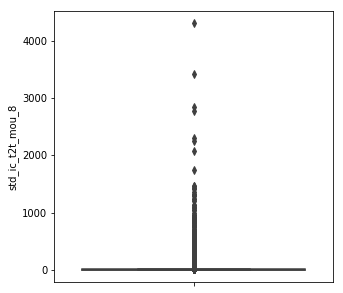

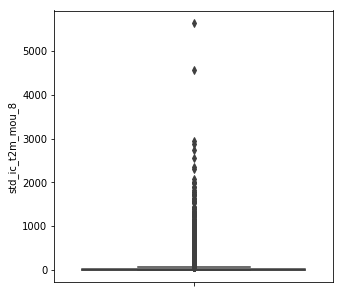

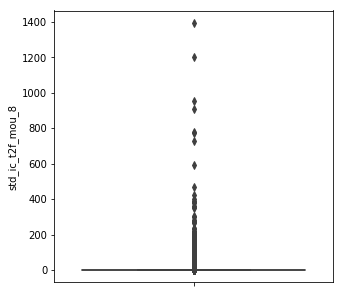

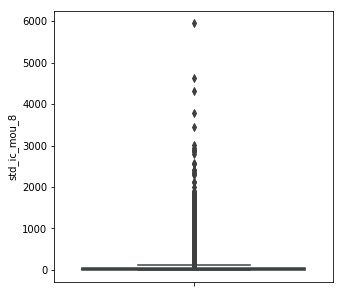

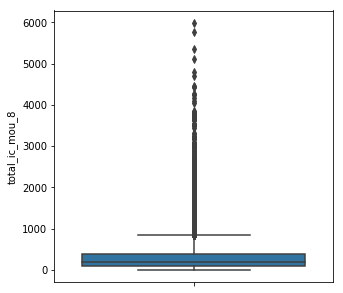

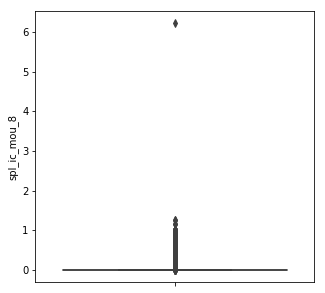

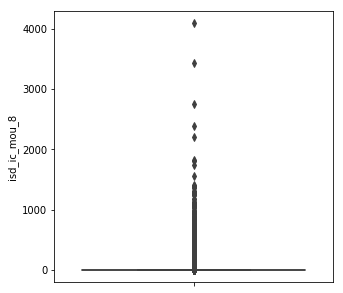

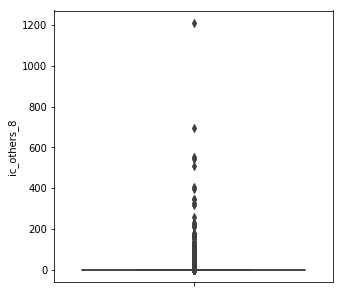

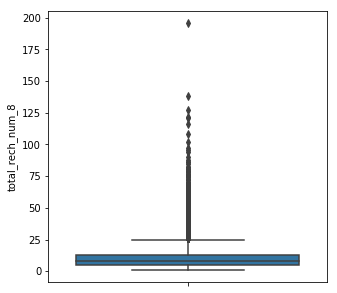

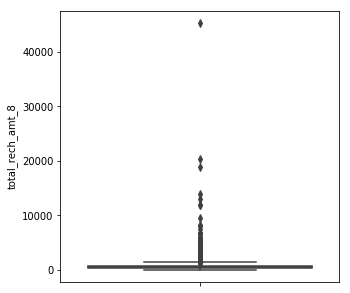

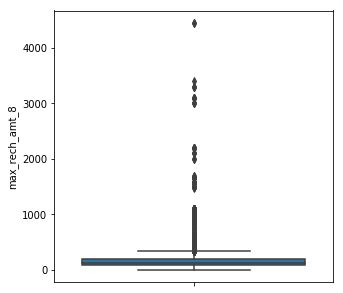

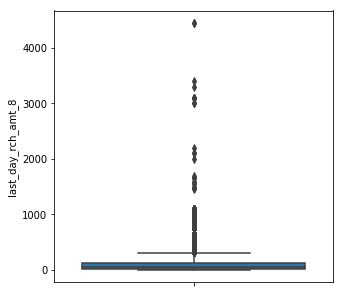

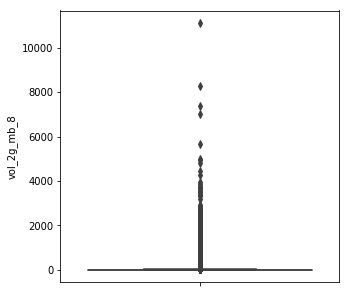

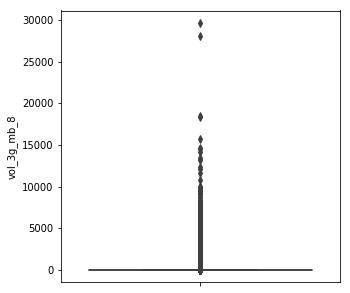

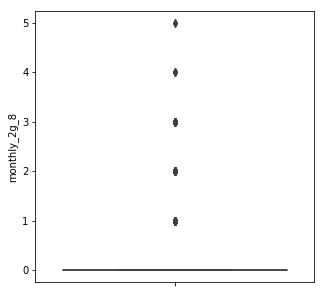

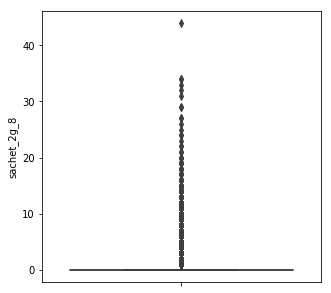

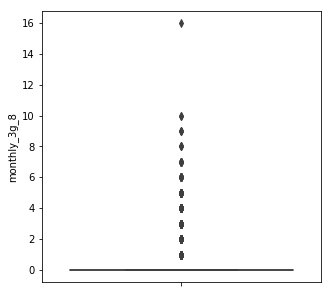

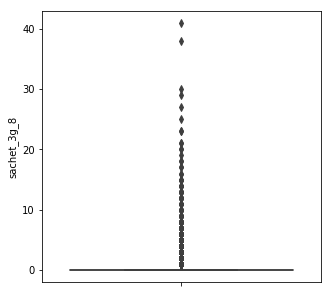

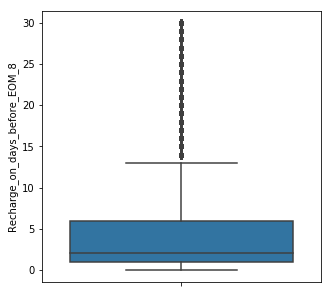

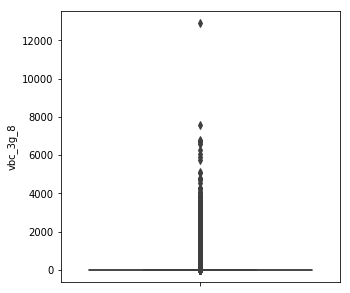

In [688]:
col_diffin_phase = [x for x in telecom_churn_reduced_8_df.columns if '_8' in x]

for col in col_diffin_phase:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=telecom_churn_reduced_8_df)
    plt.show()

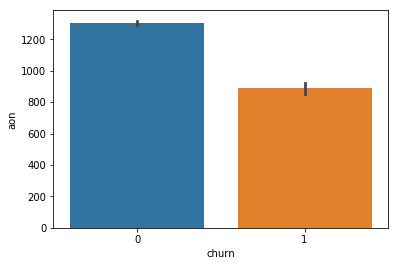

In [692]:
sns.barplot(x='churn', y='aon', data=telecom_churn_reduced_8_df)

#### Conclusion: we can observe that there are outliers in most of the attributes, lets proceed for outlier treatment and reiterate the data preparation phase

In [689]:
#dropping _diff column as EDA is already performed 

# Drop list of columns with _9 as we already created the churn data for it

_action_good_perct_diff_col = [x for x in telecom_churn_reduced_8_df.columns if '_diff' in x]
telecom_churn_reduced_9_df = telecom_churn_reduced_8_df.drop(_action_good_perct_diff_col, axis = 1)

In [690]:
telecom_churn_reduced_9_df.shape

(28455, 86)